# Planning the Project
### The Covid-19 event has been a very troubling time for all of us around the world. Due to this, I plan to use this project to conduct a study on the amount of people getting vaccinated and leverage off fear that some people have about the virus. With this I hope to share this with family members and close friends that getting fully vaccinated is one step closer to helping combat the virus.

## Questions worth discovering
#### - How has the Covid Vaccination Process progressed throughout the year?
#### - What does the total vaccination progress for certain countries look like? i.e U.S, Mexico, Canada, China, UK, etc.
#### -What does the daily vaccination progress look like for certain countries?

## Loading in libraries/modules

In [44]:
#imports all the libraries needed for the data cleaning and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
#Reads in the csv file and puts the data in a dataframe
vaccine_data = pd.read_csv(r"C:\Users\delva\OneDrive\Desktop\Data Science\Projects\datasets\country_vaccinations.csv")

## Data Pre-Processing
### Getting a glimpse of the data

In [46]:
#Gives a quick description of the data
vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.861900e+04,1.775400e+04,1.493400e+04,1.535600e+04,3.310000e+04,18619.000000,17754.000000,14934.000000,33100.000000
mean,1.339884e+07,6.173030e+06,3.610556e+06,2.347846e+05,1.181411e+05,31.711192,20.341474,13.511687,3472.557069
std,7.487555e+07,2.263797e+07,1.306956e+07,1.273120e+06,8.499546e+05,36.848835,21.430504,16.885132,4541.310256
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.379360e+05,1.110202e+05,5.200275e+04,4.507500e+03,8.410000e+02,3.310000,2.730000,1.450000,422.000000
50%,9.802550e+05,7.017030e+05,4.002405e+05,2.213300e+04,6.451500e+03,16.390000,11.675000,6.215000,1966.000000
75%,4.722680e+06,3.128880e+06,1.853223e+06,9.859150e+04,3.682175e+04,49.110000,33.607500,19.702500,5223.000000
max,1.565872e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.720000,116.730000,115.990000,118759.000000


In [47]:
#checks the shape of the data 
vaccine_data.shape

(33358, 15)

In [48]:
#Prints the first few rows from the dataset
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [49]:
vaccine_data['country'].value_counts()

Norway                             236
Latvia                             235
England                            230
Scotland                           230
Wales                              225
                                  ... 
Niue                                16
Pitcairn                             7
Haiti                                7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: country, Length: 219, dtype: int64

In [50]:
#Shows percentage of how many missing values are in each column.
vaccine_data.isnull().sum() / vaccine_data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.441843
people_vaccinated                      0.467774
people_fully_vaccinated                0.552311
daily_vaccinations_raw                 0.539661
daily_vaccinations                     0.007734
total_vaccinations_per_hundred         0.441843
people_vaccinated_per_hundred          0.467774
people_fully_vaccinated_per_hundred    0.552311
daily_vaccinations_per_million         0.007734
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

## Data Cleaning 
### Creating new dataframes with subdata for different topics of interest

In [51]:
#Drops the missing values in the dataframe
clean_vaccine_data = vaccine_data.dropna()

#Checks to see if the above line worked (it did)
clean_vaccine_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [52]:
#This line puts two columns in dataframe and drops rows with NA values.
sub_data = clean_vaccine_data[["country","date","total_vaccinations"]]

print(sub_data.head(5))

         country        date  total_vaccinations
94   Afghanistan  2021-05-27            593313.0
101  Afghanistan  2021-06-03            630305.0
192      Albania  2021-02-18              3049.0
274      Albania  2021-05-11            622507.0
275      Albania  2021-05-12            632676.0


In [53]:
#Double checks to see if sub dataframe was done correctly
sub_data.isnull().sum()

country               0
date                  0
total_vaccinations    0
dtype: int64

In [54]:
#Double checks the shape of the subset dataframe 
sub_data.shape

(12723, 3)

In [55]:
#Subsets United States data from the original data set.
US_data = sub_data.loc[sub_data["country"] == "United States"]
#prints the subset data frame to prepare for plotting
US_data

,country,date,total_vaccinations
31893,United States,2021-01-14,11148991.0
31894,United States,2021-01-15,12279180.0
31899,United States,2021-01-20,16525281.0
31900,United States,2021-01-21,17546374.0
31901,United States,2021-01-22,19107959.0
...,...,...,...
32082,United States,2021-07-22,339763765.0
32083,United States,2021-07-23,340363922.0
32084,United States,2021-07-24,341039972.0
32085,United States,2021-07-25,341818968.0


In [56]:
#changes the total_vaccinations column from string elements to integer elements.
pd.to_numeric(US_data["total_vaccinations"])

31893     11148991.0
31894     12279180.0
31899     16525281.0
31900     17546374.0
31901     19107959.0
            ...     
32082    339763765.0
32083    340363922.0
32084    341039972.0
32085    341818968.0
32086    342212051.0
Name: total_vaccinations, Length: 184, dtype: float64

## Creating Visuals to represent data

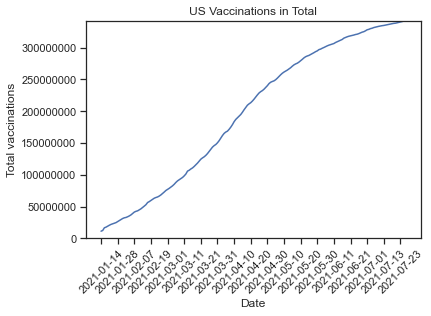

In [57]:
#Plots the graph of US Total Vaccinations. 
#Graph plots points from December 12 2020 to July 24 2021
#MATPLOTLIB GRAPH

x = US_data["date"]
y = US_data["total_vaccinations"]

plt.plot(x,y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 10), rotation = 45)
plt.ylim(0,max(y))
plt.title("US Vaccinations in Total")
plt.xlabel("Date")
plt.ylabel("Total vaccinations")

plt.show()

Text(0, 0.5, 'Total Vaccinations (per million)')

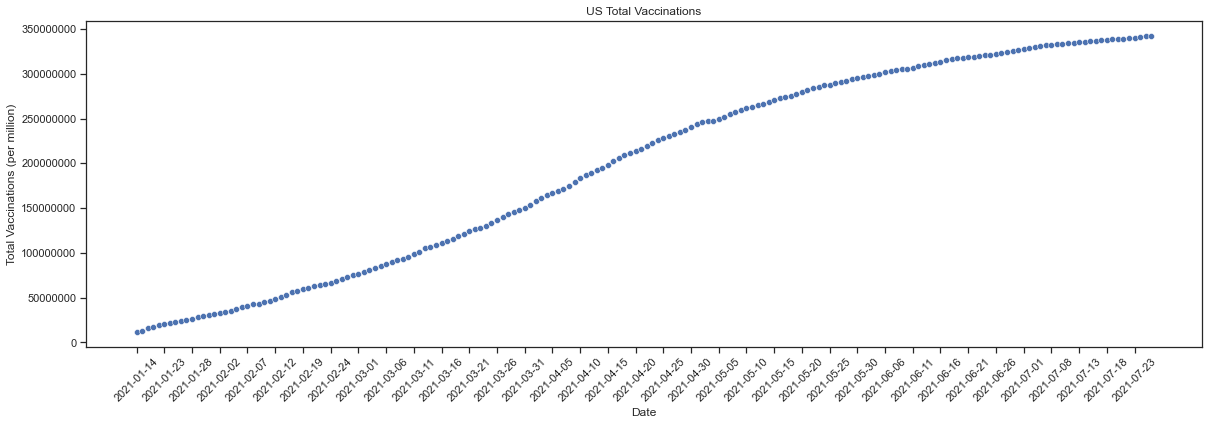

In [58]:
#SEABORN GRAPH

plt.figure(figsize = (20,6))
plt.title("US Total Vaccinations")
sns.scatterplot(x = US_data['date'], y = US_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [59]:
list(vaccine_data.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

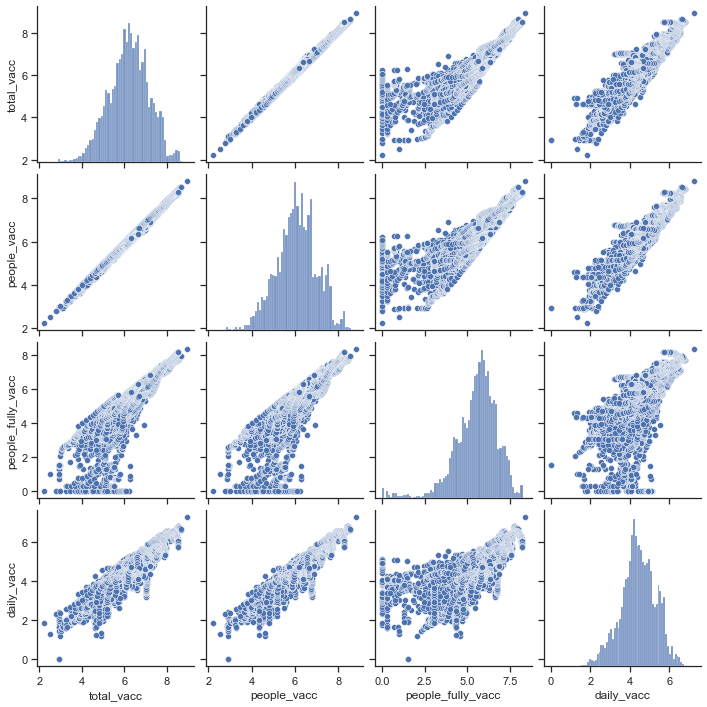

In [60]:
#Plotting scatterplot matrix using Seaborn 
#create dataframe with important features.
clean_vaccine_data['total_vacc'] = np.log10(clean_vaccine_data['total_vaccinations'])
clean_vaccine_data['people_vacc'] = np.log10(clean_vaccine_data['people_vaccinated'])
clean_vaccine_data['people_fully_vacc'] = np.log10(clean_vaccine_data['people_fully_vaccinated'])
clean_vaccine_data['daily_vacc'] = np.log10(clean_vaccine_data['daily_vaccinations'])

#drop the original nontransformed columns
clean_vaccine_data = clean_vaccine_data.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations'])


covid_features = clean_vaccine_data[['date', 'total_vacc', 'people_vacc' , 'people_fully_vacc' , 'daily_vacc']]
sns.set_theme(style="ticks")
sns.pairplot(covid_features)


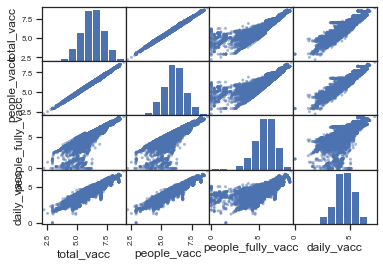

In [61]:
#Plotting scatterplot matrix with pandas.plotting 
## *NOTE* 
#This plot gives an error in kaggle. Leave this uncommented until further fix.

plot = pd.plotting.scatter_matrix(covid_features)

In [62]:
# Lets us see which countries we can pick to make a world progress map
list(clean_vaccine_data.country.unique())

['Afghanistan',
 'Albania',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Estonia',
 'Eswatini',
 'Faeroe Islands',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Laos',
 'Latvia',
 'Lebanon',
 'Liberia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macao',
 'Ma

In [63]:
#Subsets United States data from the original data set.
US_data = sub_data.loc[sub_data["country"] == "United States"]

#Subsets Mexico data from the original data set.
Mexico_data = sub_data.loc[sub_data["country"] == "Mexico"]

#Subsets Canada data from the original data set.
Canada_data = sub_data.loc[sub_data["country"] == "Canada"]

#Subsets UK data from the original data set.
UK_data = sub_data.loc[sub_data["country"] == "United Kingdom"]

#Subsets China data from the original data set.
China_data = sub_data.loc[sub_data["country"] == "China"]

#Subsets India data from the original data set.
India_data = sub_data.loc[sub_data["country"] == "India"]

In [64]:
# Combines all the 5 countries' data into one dataframe (vertically/row wise)
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, China_data, India_data], axis = 0)

# a quick check to see if selected 3 columns are present and 5 countires are present in the country column
#world_countries['country'].unique()
#world_countries.columns


## With close inspectation we see that there is only one distinct data point for China. This would mean further analysis of the data should be done to discover why China does not have a steady line present like the other countries. One assumption would be that the data was not provided.

Text(0, 0.5, 'Total Vaccinations (per million)')

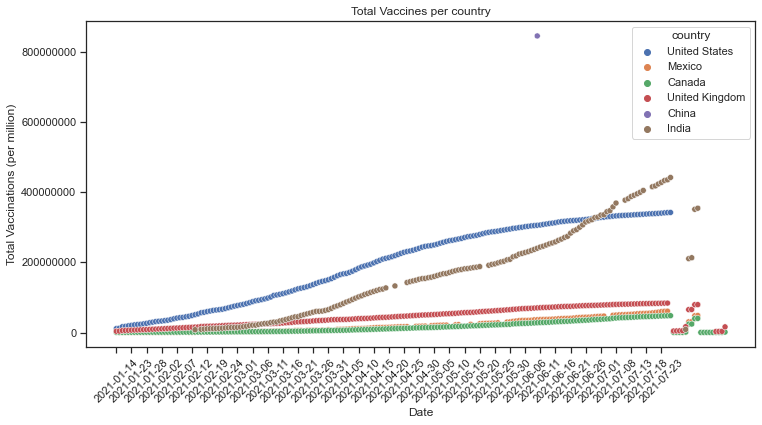

In [65]:
# Scatterplot
plt.figure(figsize = (12,6))
plt.title("Total Vaccines per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
#plt.legend()

In [66]:
len(China_data['date'])

1

In [71]:
temp = vaccine_data.loc[vaccine_data['country'] == 'China']
temp_data = temp[['date', 'country', 'total_vaccinations']]

y = temp_data.isnull().sum()
y
#temp_data.shape


date                   0
country                0
total_vaccinations    85
dtype: int64

Text(0, 0.5, 'Total Vaccinations (per million)')

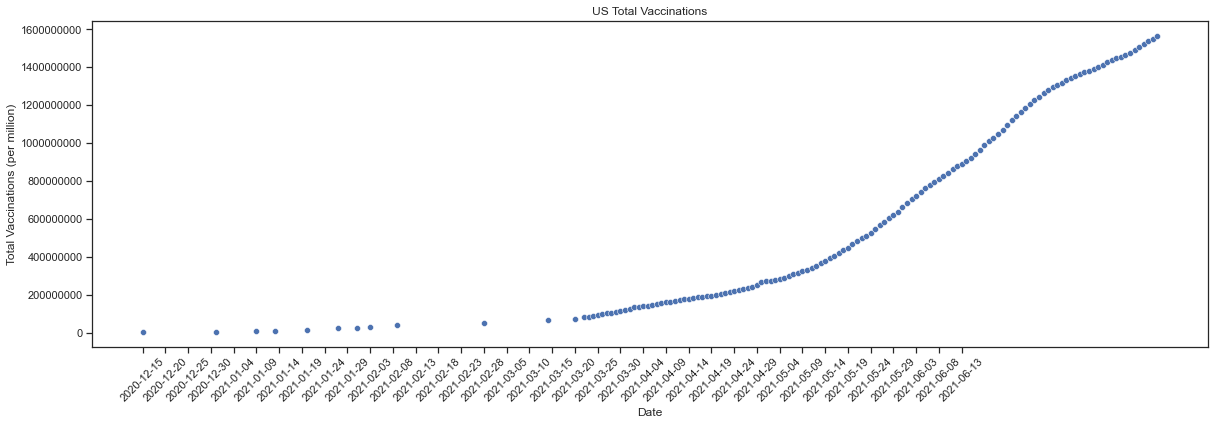

In [68]:
plt.figure(figsize = (20,6))
plt.title("US Total Vaccinations")
sns.scatterplot(x = temp_data['date'], y = temp_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [69]:
# Combines all the 5 countries' data into one dataframe (vertically/row wise)
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, temp_data, India_data], axis = 0)
world_countries.head()

,country,date,total_vaccinations
31893,United States,2021-01-14,11148991.0
31894,United States,2021-01-15,12279180.0
31899,United States,2021-01-20,16525281.0
31900,United States,2021-01-21,17546374.0
31901,United States,2021-01-22,19107959.0


Text(0, 0.5, 'Total Vaccinations (per million)')

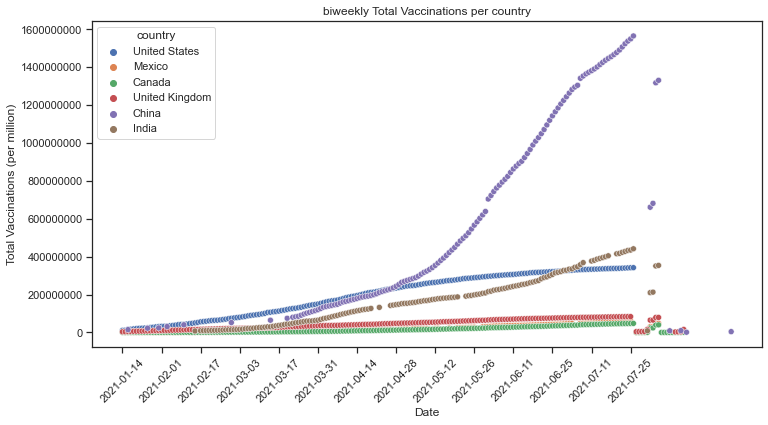

In [72]:
# Scatterplot
plt.figure(figsize = (12,6))
plt.title("biweekly Total Vaccinations per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")